In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

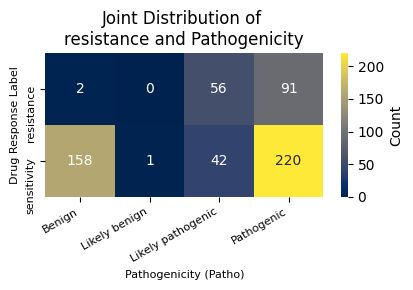

In [2]:
image_path = 'images/dataset_analysis/'
df = pd.read_csv('../datasets/merged_evidence.csv')
# Create a crosstab to count occurrences of each combination
crosstab = pd.crosstab(df['label'], df['patho'])

# Create a heatmap for the joint distribution
plt.figure(figsize=(4.3, 3))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='cividis', cbar_kws={'label': 'Count'})

# Customize the plot for better aesthetics
plt.title('Joint Distribution of \nresistance and Pathogenicity')
plt.xlabel('Pathogenicity (Patho)', fontsize=8)
plt.ylabel('Drug Response Label', fontsize=8)
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(visible=False)

# Display the plot
plt.tight_layout()
plt.savefig(image_path + 'joint-distribution-resistance.png',dpi=300)
plt.show()

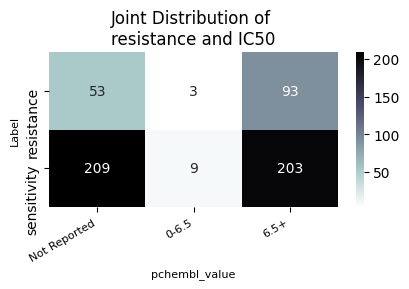

In [3]:
# Step 1: Clean the data (Handle None values in pchembl_value)
df['pchembl_value'] = df['pchembl_value'].fillna(-1)  # Replace None with -1 for missing values

df['pchembl_category'] = pd.cut(
    df['pchembl_value'],
    bins=[-float('inf'), 0, 6.5, float('inf')],
    labels=['Not Reported', '0-6.5', '6.5+']
)

# Step 2: Group data and calculate counts
grouped_data = df.groupby(['pchembl_category', 'label']).size().reset_index(name='count')

# Step 3: Pivot the data
heatmap_data = grouped_data.pivot(index='label', columns='pchembl_category', values='count').fillna(0)

# Step 4: Plot the heatmap
plt.figure(figsize=(4.3, 3))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='bone_r', cbar=True)

# Add labels and title
plt.title('Joint Distribution of \nresistance and IC50')
plt.xlabel('pchembl_value', fontsize=8)
plt.ylabel('Label', fontsize=8)
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.tight_layout()

# Show the plot
plt.savefig(image_path + 'joint-distribution-IC50.png',dpi=300)
plt.show()

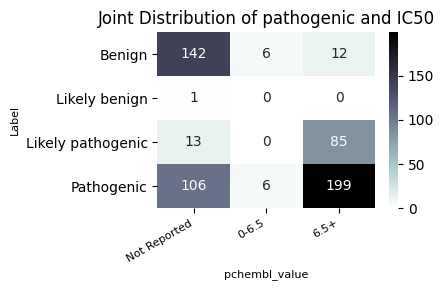

In [4]:
# Step 1: Clean the data (Handle None values in pchembl_value)
df['pchembl_value'] = df['pchembl_value'].fillna(-1)  # Replace None with -1 for missing values

df['pchembl_category'] = pd.cut(
    df['pchembl_value'],
    bins=[-float('inf'), 0, 6.5, float('inf')],
    labels=['Not Reported', '0-6.5', '6.5+']
)

# Step 2: Group data and calculate counts
grouped_data = df.groupby(['pchembl_category', 'patho']).size().reset_index(name='count')

# Step 3: Pivot the data
heatmap_data = grouped_data.pivot(index='patho', columns='pchembl_category', values='count').fillna(0)

# Step 4: Plot the heatmap
plt.figure(figsize=(4.5, 3))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='bone_r', cbar=True)

# Add labels and title
plt.title('Joint Distribution of pathogenic and IC50')
plt.xlabel('pchembl_value', fontsize=8)
plt.ylabel('Label', fontsize=8)
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.tight_layout()

# Show the plot
plt.savefig(image_path + 'joint-distribution-IC50-patho.png',dpi=300)
plt.show()